In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import *
from sympy import *
import transformations 

matplotlib.rcParams['figure.figsize'] = (18,10)

In [2]:
BN = np.array([[-0.87097, 0.45161, 0.19355],[-0.19355, -0.67742, 0.70968],[0.45161, 0.58065, 0.67742]])

In [3]:
wBN = np.array([[0.1],[0.2],[0.3]])

In [4]:
skew = np.cross(wBN.transpose(),np.eye(3))

In [5]:
np.dot(skew,BN)

array([[-0.148387, -0.319356,  0.07742 ],
       [ 0.306452, -0.077418,  0.009677],
       [-0.154839,  0.158064, -0.032258]])

# Quaternion to DCM (spacecraft-dynamics-kinematic course at coursera)

In [6]:
def QtoDCM(q):
    q0 = q[0]
    q1 = q[1]
    q2 = q[2]
    q3 = q[3]
    return np.array([[q0**2 + q1**2 - q2**2 - q3**2,       2 * (q1 * q2 + q0 * q3),       2 * (q1 * q3 - q0 * q2)],
                     [      2 * (q1 * q2 - q0 * q3), q0**2 - q1**2 + q2**2 - q3**2,       2 * (q2 * q3 + q0 * q1)],
                     [      2 * (q1 * q3 + q0 * q2),       2 * (q2 * q3 - q0 * q1), q0**2 - q1**2 - q2**2 + q3**2]],dtype=np.float64)

In [7]:
q = np.array([0.235702, 0.471405, -0.471405, 0.707107])

In [8]:
QtoDCM(q)

array([[-0.44444488, -0.11111228,  0.88888975],
       [-0.77777842, -0.44444488, -0.44444535],
       [ 0.44444535, -0.88888975,  0.11111039]])

In [9]:
R = np.array([[-0.529403, -0.474115,  0.703525],
              [-0.467056, -0.529403, -0.708231],
              [ 0.708231, -0.703525, 0.0588291]])

In [10]:
def DCMtoQ(R):
    #q  =  np.empty((4, ))
    q0 = 0.5 * np.sqrt(R.trace() + 1)
    q1 = (R[1,2] - R[2,1])/(4 * q0)
    q2 = (R[2,0] - R[0,2])/(4 * q0)
    q3 = (R[0,1] - R[1,0])/(4 * q0)
    return np.array([q0, q1, q2, q3], dtype=np.float64)

In [11]:
DCMtoQ(R)

array([ 0.00240312, -0.48957129,  0.48957129, -0.73435693])

In [12]:
DCMtoQ(R)

array([ 0.00240312, -0.48957129,  0.48957129, -0.73435693])

In [13]:
R = transformations.euler_matrix(np.deg2rad(20), np.deg2rad(10), np.deg2rad(-10), axes='rzyx')
R = R[:3, :3]

In [14]:
DCMtoQ(R)

array([ 0.97600798,  0.10058188, -0.07042819, -0.17980985])

In [15]:
QBN = np.array([0.774597, 0.258199, 0.516398, 0.258199])
QBN = QBN/np.linalg.norm(QBN)
QFB = np.array([0.359211, 0.898027, 0.179605, 0.179605])
QFB = QFB/np.linalg.norm(QFB)

In [16]:
QFN = DCMtoQ(np.dot(QtoDCM(QFB), QtoDCM(QBN)))

In [17]:
QBN = np.array([-0.377964,0.755929,0.377964,0.377964])
QBN = QBN/np.linalg.norm(QBN)
QFN = np.array([0.359211,0.898027,0.179605,0.179605])
QFN = QFN/np.linalg.norm(QFN)

In [18]:
QFB = DCMtoQ( np.dot( QtoDCM( QFB ), np.transpose( QtoDCM( QBN ) ) ) )

In [19]:
QFB

array([  6.78844289e-01,  -6.10959902e-01,  -4.07306309e-01,
         1.98359004e-07])

# Book 3.32 

In [20]:
# 10 = 0.5 * 20
def rot(y, t):
    q0, q1, q2, q3 = y
    dydt =  [np.deg2rad(10) * (                      - np.sin(0.1 * t) * q1 -            0.01 * q2 - np.cos(0.1 * t) * q3),
             np.deg2rad(10) * ( np.sin(0.1 * t) * q0                        + np.cos(0.1 * t) * q2 -            0.01 * q3),
             np.deg2rad(10) * (            0.01 * q0 - np.cos(0.1 * t) * q1                        + np.sin(0.1 * t) * q3),
             np.deg2rad(10) * ( np.cos(0.1 * t) * q0 +            0.01 * q1 - np.sin(0.1 * t) * q2                        )]
    return dydt

In [21]:
y0 = [0.408248, 0., 0.408248, 0.816497]

In [27]:
t = np.linspace(0, 60, 350)

In [28]:
sol = odeint(rot, y0, t)

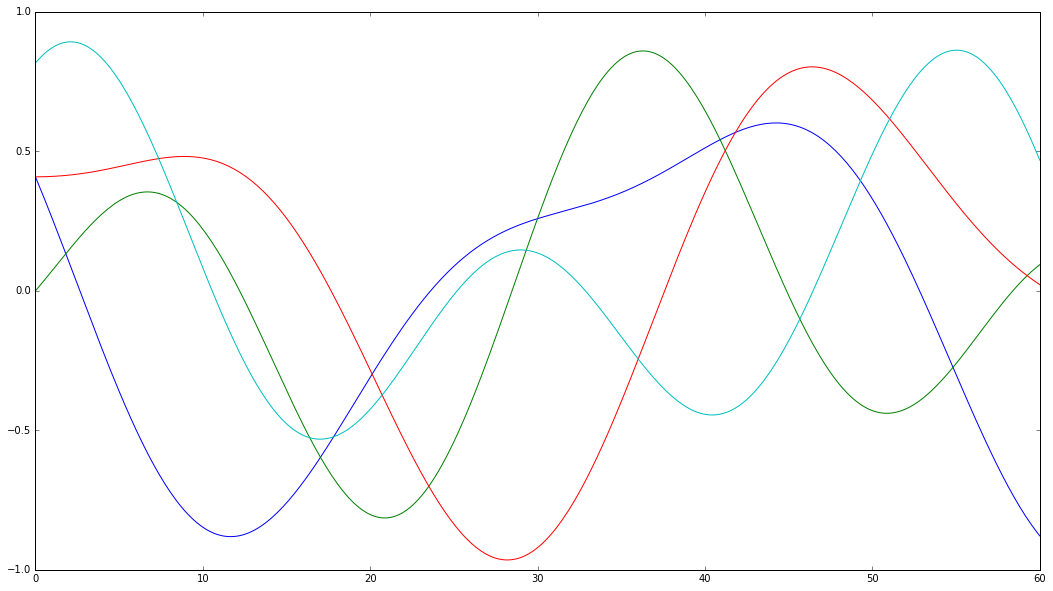

In [29]:
plt.plot(t, sol[:,0], t, sol[:,1], t, sol[:,2], t, sol[:,3])

# Quiz:2.7 

In [30]:
R = transformations.euler_matrix(np.deg2rad(20), np.deg2rad(10), np.deg2rad(-10), axes='rzyx')

In [31]:
transformations.euler_from_matrix(R, axes='rzxz')

(2.7129144573598323, 0.24619691677893205, -2.348540373423724)

In [33]:
q1, q2, q3 = symbols('q1:4')

In [34]:
R1 = rot_axis2(-q1)
R2 = rot_axis3(-q2)
R3 = rot_axis2(-q3)

In [35]:
(R1 * R2 * R3)

Matrix([
[-sin(q1)*sin(q3) + cos(q1)*cos(q2)*cos(q3), -sin(q2)*cos(q1),  sin(q1)*cos(q3) + sin(q3)*cos(q1)*cos(q2)],
[                           sin(q2)*cos(q3),          cos(q2),                            sin(q2)*sin(q3)],
[-sin(q1)*cos(q2)*cos(q3) - sin(q3)*cos(q1),  sin(q1)*sin(q2), -sin(q1)*sin(q3)*cos(q2) + cos(q1)*cos(q3)]])

In [38]:
L, r = symbols('L r')

In [39]:
R1 = Matrix([[cos(q1), -sin(q1), 0, 0],
             [sin(q1),  cos(q1), 0, 0],
             [      0,        0, 1, 0],
             [      0,        0, 0, 1]])

In [40]:
trans = Matrix([[1, 0, 0, L],
                [0, 1, 0, 0],
                [0, 0, 1, r],
                [0, 0, 0, 1]])

In [41]:
q2 = (q1 * L)/r
R2 = Matrix([[1,       0,        0, 0],
             [0, cos(q2), -sin(q2), 0],
             [0, sin(q2),  cos(q2), 0],
             [0,       0,        0, 1]])

In [42]:
R = (R1 * trans * R2)

In [44]:
R[:3, :3].T

Matrix([
[             cos(q1),              sin(q1),           0],
[-sin(q1)*cos(L*q1/r),  cos(q1)*cos(L*q1/r), sin(L*q1/r)],
[ sin(q1)*sin(L*q1/r), -sin(L*q1/r)*cos(q1), cos(L*q1/r)]])

In [45]:
R[:3, :3] * Matrix([[2],[1],[1]])

Matrix([
[sin(q1)*sin(L*q1/r) - sin(q1)*cos(L*q1/r) + 2*cos(q1)],
[2*sin(q1) - sin(L*q1/r)*cos(q1) + cos(q1)*cos(L*q1/r)],
[                            sin(L*q1/r) + cos(L*q1/r)]])

In [46]:
R[:3, :3]

Matrix([
[cos(q1), -sin(q1)*cos(L*q1/r),  sin(q1)*sin(L*q1/r)],
[sin(q1),  cos(q1)*cos(L*q1/r), -sin(L*q1/r)*cos(q1)],
[      0,          sin(L*q1/r),          cos(L*q1/r)]])

In [32]:
# lazy guy's way to write skew function :D
def skew(v):
    return np.cross(np.eye(3), v)

In [33]:
w = skew([1, 2, 3])

In [34]:
np.dot(w,[1, 2, 3])

array([ 0.,  0.,  0.])

# Quiz:2.8 

In [103]:
RNB = transformations.euler_matrix(np.deg2rad(10), np.deg2rad(20), np.deg2rad(30), axes='rzyx')
RNR = transformations.euler_matrix(np.deg2rad(-5),  np.deg2rad(5),   np.deg2rad(5), axes='rzyx')
RRB = np.dot(np.linalg.inv(RNR),RNB)
np.rad2deg(transformations.euler_from_matrix(RRB, axes='rzyx'))

array([ 13.22381821,  16.36834338,  23.61762825])

# Quiz:2.(11,12) 

In [35]:
def CRPtoDCM(q):
    q1 = q[0]
    q2 = q[1]
    q3 = q[2]
    p_norm = np.linalg.norm(q)
    return (1/(1 + p_norm)) * np.array([[1 + q1**2 - q2**2 - q3**2,        2 * (q1 * q2 + q3),        2 * (q1 * q3 - q2)],
                                        [       2 * (q2 * q1 - q3), 1 - q1**2 + q2**2 - q3**2,        2 * (q2 * q3 + q1)],
                                        [       2 * (q3 * q1 + q2),        2 * (q3 * q2 - q1), 1 - q1**2 - q2**2 + q3**2]])

In [40]:
q = [.1, .2, .3]

In [41]:
CRPtoDCM(q)

array([[ 0.64038855,  0.46573712, -0.24742285],
       [-0.40751998,  0.6840514 ,  0.23286856],
       [ 0.33474856, -0.05821714,  0.75682283]])

In [46]:
def DCMtoCRP(R):
    trace = R.trace()
    zeta = trace + 1
    return (1/zeta)* np.array([[R[1,2] - R[2,1]],
                               [R[2,0] - R[0,2]],
                               [R[0,1] - R[1,0]]])

In [56]:
R = np.array([[ 0.333333,  0.871795, -0.358974],
              [-0.666667,  0.487179,  0.564103],
              [ 0.666667, 0.0512821,   0.74359]]).T

In [54]:
DCMtoCRP(R)

array([[-0.2000002 ],
       [-0.40000008],
       [-0.60000031]])

In [50]:
RFN = CRPtoDCM([ .1, .2, .3])
RBN = CRPtoDCM([-.3, .3, .1])

In [51]:
RFB = np.dot(RFN, np.linalg.inv(RBN))

In [52]:
DCMtoCRP(RFB)

array([[ 0.31141592],
       [-0.18873692],
       [ 0.27366854]])

# Quiz: 2.9 

In [72]:
q1, q2, q3 = symbols('q1:4')
R1 = rot_axis2(-q1)
R2 = rot_axis3(-q2)
R3 = rot_axis2(-q3)

In [73]:
(R3).T

Matrix([
[cos(q3), 0, -sin(q3)],
[      0, 1,        0],
[sin(q3), 0,  cos(q3)]])

In [74]:
(R1 * R2 * R3).T

Matrix([
[-sin(q1)*sin(q3) + cos(q1)*cos(q2)*cos(q3), sin(q2)*cos(q3), -sin(q1)*cos(q2)*cos(q3) - sin(q3)*cos(q1)],
[                          -sin(q2)*cos(q1),         cos(q2),                            sin(q1)*sin(q2)],
[ sin(q1)*cos(q3) + sin(q3)*cos(q1)*cos(q2), sin(q2)*sin(q3), -sin(q1)*sin(q3)*cos(q2) + cos(q1)*cos(q3)]])

In [84]:
BN = Matrix([[sin(q2) * cos(q3), -sin(q3), 0],
             [          cos(q2),        0, 1],
             [sin(q2) * sin(q3),  cos(q3), 0]])

In [106]:
BN_adj =  Matrix([[-cos(q3),  sin(q2) * sin(q3), cos(q2) * cos(q3)],
                  [       0,                  0,          -sin(q2)],
                  [-sin(q3), -sin(q2) * cos(q3), sin(q3) * cos(q2)]]).T

BN_det = -sin(q2)
NB = (1/BN_det) * BN_adj 

In [110]:
NB

Matrix([
[         cos(q3)/sin(q2), 0,          sin(q3)/sin(q2)],
[                -sin(q3), 0,                  cos(q3)],
[-cos(q2)*cos(q3)/sin(q2), 1, -sin(q3)*cos(q2)/sin(q2)]])

In [144]:
# 10 = 0.5 * 20
def rot(y, t):
    q1, q2, q3 = y
    dydt =  [np.deg2rad(20) * (                  (np.sin(q3) / np.cos(q2)) * 0.01  +      (np.cos(q3)/np.cos(q2)) * np.cos(0.1 * t)),
             np.deg2rad(20) * (                               (np.cos(q3)) * 0.01  +                (-np.sin(q3)) * np.cos(0.1 * t)),
             np.deg2rad(20) * (np.sin(0.1 * t) + (np.sin(q3) * np.tan(q2)) * 0.01  +    (np.cos(q3) * np.tan(q2)) * np.cos(0.1 * t))]
    return dydt

In [145]:
y0 = np.deg2rad([40, 30, 80])
#y0 = [40, 30, 80]

In [149]:
t = np.linspace(0, 60, 100)

In [150]:
sol = odeint(rot, y0, t)

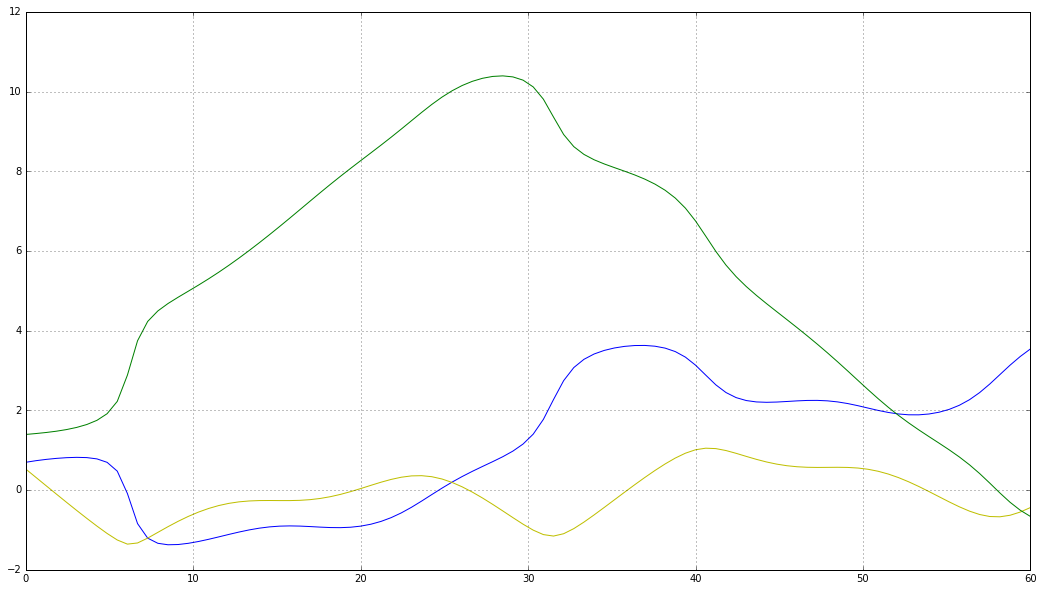

In [151]:
plt.plot(t, sol[:,0], 'b', t, sol[:,1], 'y', t, sol[:,2], 'g')
plt.grid(true)
plt.legend(loc='best')

# Quiz: 2.13 

In [101]:
# 10 = 0.5 * 20
def rot(y, t):
    q1, q2, q3 = y
    dydt =  [np.deg2rad(3/2) * (   (1 + q1**2) * np.sin(0.1 * t) + (q1 * q2 - q3) * 0.01  + (q1 * q3 + q2) * np.cos(0.1 * t)),
             np.deg2rad(3/2) * ((q2 * q1 + q3) * np.sin(0.1 * t) +    (1 + q2**2) * 0.01  + (q2 * q3 - q1) * np.cos(0.1 * t)),
             np.deg2rad(3/2) * ((q3 * q1 - q2) * np.sin(0.1 * t) + (q3 * q2 + q1) * 0.01  +    (1 + q3**2) * np.cos(0.1 * t))]
    return dydt

In [102]:
y0 = [0.4, 0.2, -0.1]

In [107]:
t = np.linspace(0, 60, 300)

In [108]:
sol = odeint(rot, y0, t)

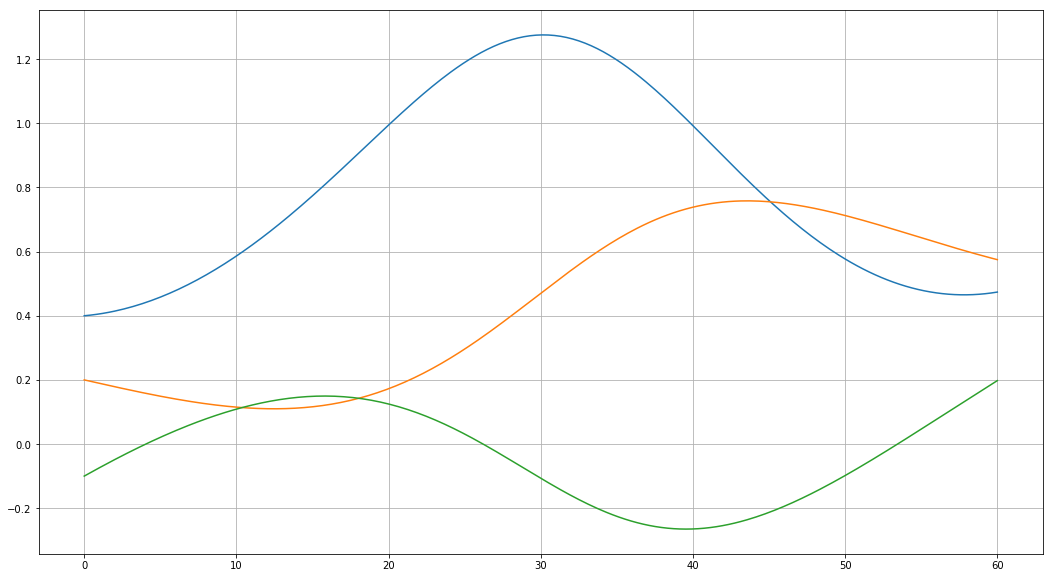

In [110]:
plt.plot(t, sol[:,0], t, sol[:,1], t, sol[:,2])
plt.grid(true)